# Fake News Detection - Data Exploration & Visualization

## **1. Setup & Load Data**

### **Install Required Packages** (Run only if not installed)
```python
!pip install pandas matplotlib seaborn nltk wordcloud
```

### **Import Dependencies**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import os
from nltk.corpus import stopwords

# Set custom NLTK data path (inside project folder)
NLTK_DATA_PATH = os.path.join(os.getcwd(), "nltk_data")
nltk.data.path.append(NLTK_DATA_PATH)

# Check if stopwords exist before downloading
if not os.path.exists(os.path.join(NLTK_DATA_PATH, "corpora/stopwords")):
    nltk.download('stopwords', download_dir=NLTK_DATA_PATH)


### **Load Processed Data**

In [10]:
# Load datasets
train_df = pd.read_csv("../data/processed/train.csv")
valid_df = pd.read_csv("../data/processed/valid.csv")
test_df = pd.read_csv("../data/processed/test.csv")

# Display dataset information
print("Training set:", train_df.shape)
print("Validation set:", valid_df.shape)
print("Test set:", test_df.shape)
train_df.head()

Training set: (10240, 2)
Validation set: (1284, 2)
Test set: (1267, 2)


,cleaned_statement,label
0,says annies list political group supports thir...,4
1,decline coal start started natural gas took st...,2
2,hillary clinton agrees john mccain voting give...,1
3,health care reform legislation likely mandate ...,4
4,economic turnaround started end term,2


## **2. Data Exploration**

### **Class Distribution**

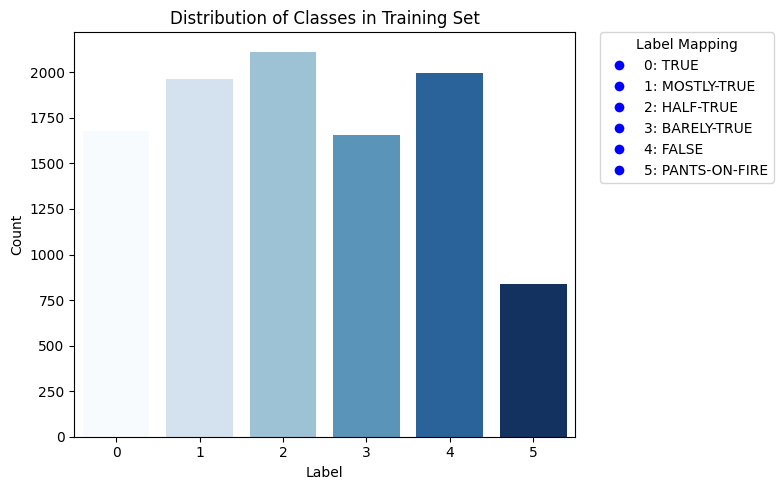

In [11]:
# Define label mapping (same as in preprocess.py)
LABEL_MAP = {
    0: "TRUE",
    1: "MOSTLY-TRUE",
    2: "HALF-TRUE",
    3: "BARELY-TRUE",
    4: "FALSE",
    5: "PANTS-ON-FIRE"
}

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=train_df, x="label", hue="label", palette="Blues", legend=False)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="blue", markersize=8) for _ in LABEL_MAP]
labels = [f"{num}: {text}" for num, text in LABEL_MAP.items()]

# Place the legend **outside the plot**
plt.legend(handles, labels, title="Label Mapping", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.title("Distribution of Classes in Training Set")
plt.xlabel("Label")
plt.ylabel("Count")

# Adjust layout to prevent cropping
plt.tight_layout()

plt.show()


### **Check Text Length Distribution**

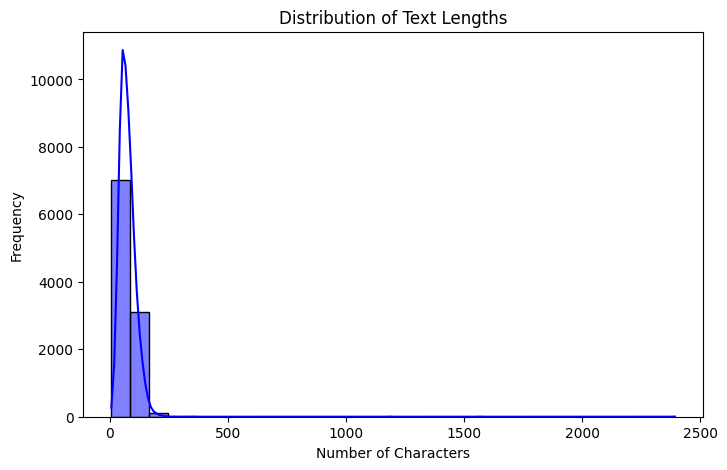

In [12]:
train_df['text_length'] = train_df['cleaned_statement'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=30, kde=True, color="blue")
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

## **3. Word Cloud - Most Common Words**

### **Generate a Word Cloud**

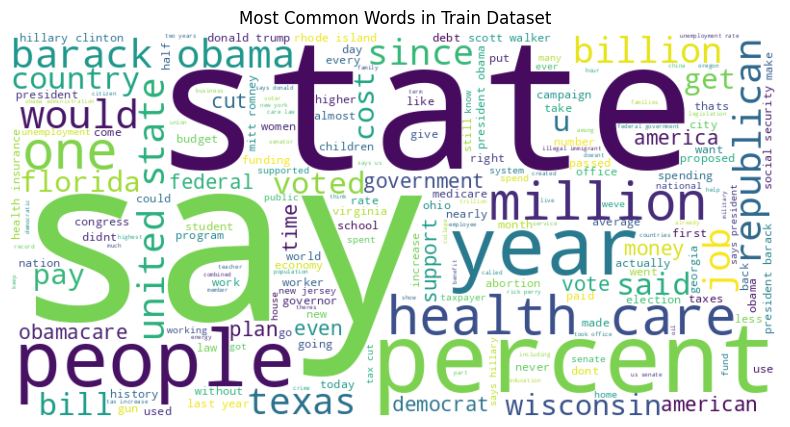

In [13]:
stop_words = set(stopwords.words("english"))
text = " ".join(train_df['cleaned_statement'])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Train Dataset")
plt.show()

## **4. Display Example Statements from Each Class**

In [14]:
for label in sorted(train_df['label'].unique()):
    print(f"\nExample statement for label {label}:")
    print(train_df[train_df['label'] == label]['cleaned_statement'].values[0])


Example statement for label 0:
chicago bears starting quarterbacks last years total number tenured uw faculty fired last two decades

Example statement for label 1:
hillary clinton agrees john mccain voting give george bush benefit doubt iran

Example statement for label 2:
decline coal start started natural gas took started begin president george w bushs administration

Example statement for label 3:
jim dunnam lived district represents years

Example statement for label 4:
says annies list political group supports thirdtrimester abortions demand

Example statement for label 5:
case catastrophic event atlantaarea offices centers disease control prevention selfdestruct


## Summary
- The dataset contains [X] training samples and [Y] test samples.
- Class distribution shows an imbalance in [certain labels].
- The most common words in the dataset relate to [topic].

## Next Steps
- Tokenization & Model Training (Using `train.py`)
